In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Simulate import *
sim = Simulator()

In [2]:
np.max([0,2,3,5,6,4,9,2])

9

In [3]:
sim.detector.reset()

In [4]:
a = 0.6
v = 0.02
position = a*(2.*np.random.random(2)-[1.,1.])
velocity = v*(2.*np.random.random(2)-[1.,1.])

position = [0.,0.]
velocity = [0.05,0.001]

pt=np.linalg.norm(velocity)
phi=np.arctan2(velocity[1],velocity[0])
xVtx=position[0]
yVtx=position[1]

simtrack1=sim.propagate([0.5,0.5],[5.,0.1], step = 1, id=0)
simtrack2=sim.propagate([0.5,0.5],[1.,-0.5], step = 1, id=1)
simtrack3=sim.propagate([0.,0.],[-0.1,-2.], step = 1, id=2)
simtrack4=sim.propagate([0.,0.],[1.5,3.], step = 1, id=3)

hits=sim.detector.getHits()

In [5]:
hits

,hit,layer,particle,x,y
2,2,0,0,6.741808e-01,0.489821
12,12,2,0,1.566154e+00,0.570034
18,18,4,0,2.377641e+00,0.772542
20,20,5,0,2.773915e+00,0.901300
22,22,7,0,3.523847e+00,1.282576
23,23,8,0,3.863266e+00,1.560861
24,24,9,0,4.249593e+00,1.716947
25,25,11,0,4.868468e+00,2.374510
0,0,0,1,7.357897e-01,0.391226
1,1,0,1,7.216878e-01,0.416667


In [6]:
x=hits['x'].values
y=hits['y'].values


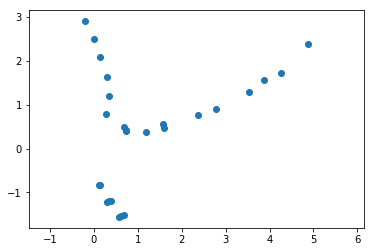

In [7]:
plt.scatter(x,y)
plt.axis('equal')

axes = plt.gca()
#axes.set_xlim([-2,2])
#axes.set_ylim([-2,2])

plt.show()

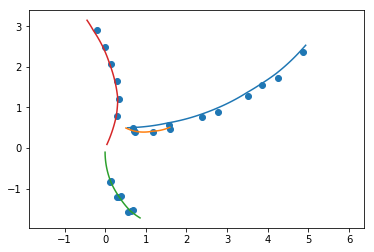

In [8]:
plt.plot(simtrack1['x'].values,simtrack1['y'].values)
plt.plot(simtrack2['x'].values,simtrack2['y'].values)
plt.plot(simtrack3['x'].values,simtrack3['y'].values)
plt.plot(simtrack4['x'].values,simtrack4['y'].values)

plt.scatter(x,y)
plt.axis('equal')

axes = plt.gca()
#axes.set_xlim([-2,2])
#axes.set_ylim([-2,2])

plt.show()

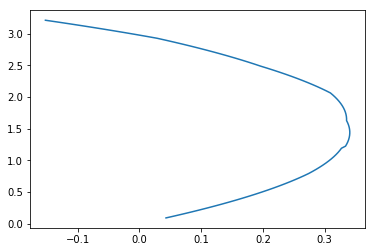

In [8]:
sim.plot()

In [9]:
sim.detector.cells_r

array([ 0.83333333,  1.25      ,  1.66666667,  2.08333333,  2.5       ,
        2.91666667,  3.33333333,  3.75      ,  4.16666667,  4.58333333,
        5.        ,  5.41666667])

In [10]:
from Fitting import *

In [11]:
particle_df = hits.loc[hits['particle']==0]

In [12]:
x=particle_df['x'].values
y=particle_df['y'].values

In [13]:
fitter = TrackFitter(B=1.)

In [14]:
x,y

(array([ 0.67418083,  1.14193182,  1.56615437,  2.34923155,  2.74077014,
         3.13230874,  3.47693945,  3.80643941,  4.41473796,  4.69097094]),
 array([ 0.48982104,  0.5084208 ,  0.57003357,  0.85505036,  0.99755875,
         1.14006714,  1.40477473,  1.69473601,  2.34735781,  2.70833333]))

In [15]:
fitter.fit(x,y)

TypeError: fit() takes exactly 2 arguments (3 given)

In [16]:
def circular_path(x, r, vx, vy):
    return r - np.sqrt(r**2-(x-vx)**2) + vy


def rotateArray(x, y, phi):
    c, s = np.cos(phi), np.sin(phi)
    xr=c*x-s*y
    yr=s*x+c*y

    return xr,yr


def rotateToQuadrant(x,y):
    seedx=x[1]-x[0]
    seedy=y[1]-y[0]
    phi0=np.arctan2(y[0],x[0])
    phi1=np.arctan2(seedy,seedx)
    phi=phi1
    xr,yr=rotateArray(x,y,-phi)
    return xr,yr,phi

def fit(x,y):
    xr,yr,phi=rotateToQuadrant(x,y);
    p, cov = curve_fit(circular_path, xr, yr,
                       p0=[200.,0.,0.],
                       bounds=([5.,-25.,-25.],
                               [1000., 25, 25]
                               )
                       )

    r = p[0]
    pt = r
    vx = p[1]
    vy = p[2]
    chg = 1
    return  pt,phi,vx,vy,chg





In [17]:
fit(x,y)

(5.0000000000001386,
 0.039743296200480893,
 0.74551279613914412,
 0.44536258278910779,
 1)